# Ejercicio 8
(Entrega obligatoria individual en repo) En lo posible, realizar videos donde una clase de objeto difiera en número con otros objetos (sino, utilizar videos bajados de internet). Por ejemplo, al aire libre, un perro que se mueva entre personas en un parque. Una persona en bicicleta entre muchos autos en una calle de la ciudad. Luego, utilizar los distintos algoritmos presentados en teoría para detectar solo la clase minoritaria con su respectiva etiqueta. Indicando en cada caso la herramienta utilizada y comparando los niveles de confianza de detección logrados.

In [4]:
!pip install -U kora

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.0 MB/s eta 0:00:00


In [5]:
!pip install supervision
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 976.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.1/752.1 kB 6.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-man

In [6]:
# Importar las librerías necesarias
import supervision as sv  # Librería para el seguimiento de objetos
from ultralytics import YOLO  # Librería para la detección de objetos con YOLO
import numpy as np  # Librería para operaciones matemáticas y manejo de arrays

class Tracker:
  def __init__(self, src, out, model_name):
    self.src = src
    self.out = out
    self.model_name = model_name
    self.model = YOLO(self.model_name)
    self.tracker = sv.ByteTrack()
    self.bba = sv.BoundingBoxAnnotator()
    self.la = sv.LabelAnnotator()

  def track(self):
    sv.process_video(
      source_path=self.src,
      target_path=self.out,
      callback=self._callback
    )

  def _callback(self, frame, index):
    results = self.model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = self.tracker.update_with_detections(detections)

    # labels = [f"#{tracker_id}" for tracker_id in detections.tracker_id]

    if(len(detections) == 0): return frame

    class_0_idx_arr = np.where(detections.class_id == 0)
    if(len(class_0_idx_arr) == 0): return frame
    class_0_idx = class_0_idx_arr[0]

    filtered_detections = detections[class_0_idx]

    labels = [f"#{tracker_id}" for tracker_id in filtered_detections.tracker_id]

    annotated_frame = self.bba.annotate(
        scene=frame.copy(), detections=filtered_detections)
    if(len(labels) == len(detections)):
      annotated_frame = self.la.annotate(
        scene=annotated_frame, detections=filtered_detections, labels=labels)
    return annotated_frame

tracker = Tracker("dogs.mp4", "dogs_tracking.mp4", "yolov8x.pt")
tracker.track()

100%|██████████| 131M/131M [00:00<00:00, 143MB/s]



0: 384x640 1 person, 1 bird, 6165.0ms
Speed: 21.5ms preprocess, 6165.0ms inference, 4979.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 boat, 1 bird, 7946.0ms
Speed: 7.8ms preprocess, 7946.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 dogs, 3047.3ms
Speed: 2.5ms preprocess, 3047.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 boat, 1 bird, 2341.3ms
Speed: 2.5ms preprocess, 2341.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 boat, 1 dog, 2 horses, 2375.0ms
Speed: 2.6ms preprocess, 2375.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 boat, 1 dog, 1 horse, 2957.3ms
Speed: 3.3ms preprocess, 2957.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 boat, 1 dog, 2 horses, 2615.1ms
Speed: 3.0ms preprocess, 2615.1ms inference, 1.2ms postprocess 

IndexError: index 0 is out of bounds for axis 0 with size 0

In [3]:
import numpy as np
np.where(np.array([1, 2, 3]) == 10)

(array([], dtype=int64),)

# Ejercicio 9
(Entrega obligatoria individual en repo) Tomar fotografías donde coexistan varios objetos en posiciones solapadas y no, en contextos de diferente complejidad. Luego, aplicar los algoritmos de segmentación propuestos y verificar los resultados de cada uno. Comentar qué diferencias observa.

In [1]:
!pip install timm

In [3]:
import io
import requests
from PIL import Image, ImageDraw, ImageFont
import torch
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from transformers import DetrFeatureExtractor, DetrForSegmentation
from transformers.models.detr.feature_extraction_detr import rgb_to_id

In [1]:

class Segmentador:

  PATHS = ['perro1.jpg', 'perros2.jpg', 'perros3.jpg']
  segmented_paths = []
  COCO_LABELS = {
    1: 'persona', 2: 'bicicleta', 3: 'coche', 4: 'motocicleta', 5: 'avión',
    6: 'autobús', 7: 'tren', 8: 'camión', 9: 'barco', 10: 'semáforo',
    11: 'hidrante', 13: 'señal de stop', 14: 'parquímetro', 15: 'banco', 16: 'pájaro',
    17: 'gato', 18: 'perro', 19: 'caballo', 20: 'oveja', 21: 'vaca',
    22: 'elefante', 23: 'oso', 24: 'cebra', 25: 'jirafa', 27: 'mochila',
    28: 'paraguas', 31: 'bolso de mano', 32: 'corbata', 33: 'maleta', 34: 'frisbee',
    36: 'tabla de snowboard', 37: 'pelota deportiva', 38: 'cometa', 39: 'bate de béisbol',
    40: 'guante de béisbol', 41: 'patineta', 42: 'tabla de surf', 43: 'raqueta de tenis',
    44: 'botella', 46: 'plato de vino', 47: 'taza', 48: 'tenedor', 49: 'cuchillo',
    50: 'cuchara', 51: 'tazón', 52: 'banana', 53: 'manzana', 54: 'sándwich',
    55: 'naranja', 56: 'brócoli', 57: 'zanahoria', 58: 'perrito caliente', 59: 'pizza',
    60: 'donut', 61: 'pastel', 62: 'silla', 63: 'sofá', 64: 'maceta', 65: 'cama',
    67: 'mesa de comedor', 70: 'inodoro', 72: 'TV', 73: 'computadora portátil', 74: 'ratón',
    75: 'control remoto', 76: 'teclado', 77: 'teléfono celular', 78: 'microondas',
    79: 'horno', 80: 'tostadora', 81: 'fregadero', 82: 'refrigerador', 84: 'libro',
    85: 'reloj', 86: 'florero', 87: 'tijeras', 88: 'oso de peluche', 89: 'secador de pelo',
    90: 'cepillo de dientes'
  }

  def segmentar(self):
    for path in self.PATHS:
      image = Image.open(path)

      feature_extractor = DetrFeatureExtractor.from_pretrained("facebook/detr-resnet-50-panoptic")
      model = DetrForSegmentation.from_pretrained("facebook/detr-resnet-50-panoptic")

      inputs = feature_extractor(images=image, return_tensors="pt")

      outputs = model(**inputs)

      processed_sizes = torch.as_tensor(inputs["pixel_values"].shape[-2:]).unsqueeze(0)
      result = feature_extractor.post_process_panoptic(outputs, processed_sizes, threshold=0.85)[0]

      panoptic_seg = Image.open(io.BytesIO(result["png_string"]))
      panoptic_seg = np.array(panoptic_seg, dtype=np.uint8)
      panoptic_seg_id = rgb_to_id(panoptic_seg)

      palette = itertools.cycle(sns.color_palette())

      segmented_image = Image.fromarray(np.zeros_like(panoptic_seg, dtype=np.uint8))
      draw = ImageDraw.Draw(segmented_image)

      for segment_info in result["segments_info"]:
          class_id = segment_info["category_id"]
          class_name = self.COCO_LABELS.get(class_id, 'Desconocido')  # 'Desconocido' si el ID no está en el diccionario
          id = segment_info["id"]

          mask = panoptic_seg_id == id
          color = np.array(next(palette)) * 255

          mask_image = Image.fromarray((mask * 255).astype(np.uint8))

          color_image = Image.new("RGB", segmented_image.size, color=tuple(color.astype(int)))

          segmented_image.paste(color_image, (0,0), mask=mask_image)

          draw = ImageDraw.Draw(segmented_image)
          where = np.where(mask)
          if where[0].size > 0 and where[1].size > 0:
              x, y = np.min(where[1]), np.min(where[0])
              draw.text((x, y), class_name, fill='white')

      self.segmented_paths.append(segmented_image)

  def show(self):
    images = []
    for path in self.PATHS:
        image = Image.open(path)
        images.append(image)

    plt.figure(figsize=(30, 15))

    for i in range(3):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i])
        plt.axis('off')

    for i in range(3):
        plt.subplot(2, 3, i+4)
        plt.imshow(self.segmented_paths[i])
        plt.axis('off')

    plt.show()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/detr/feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.mo

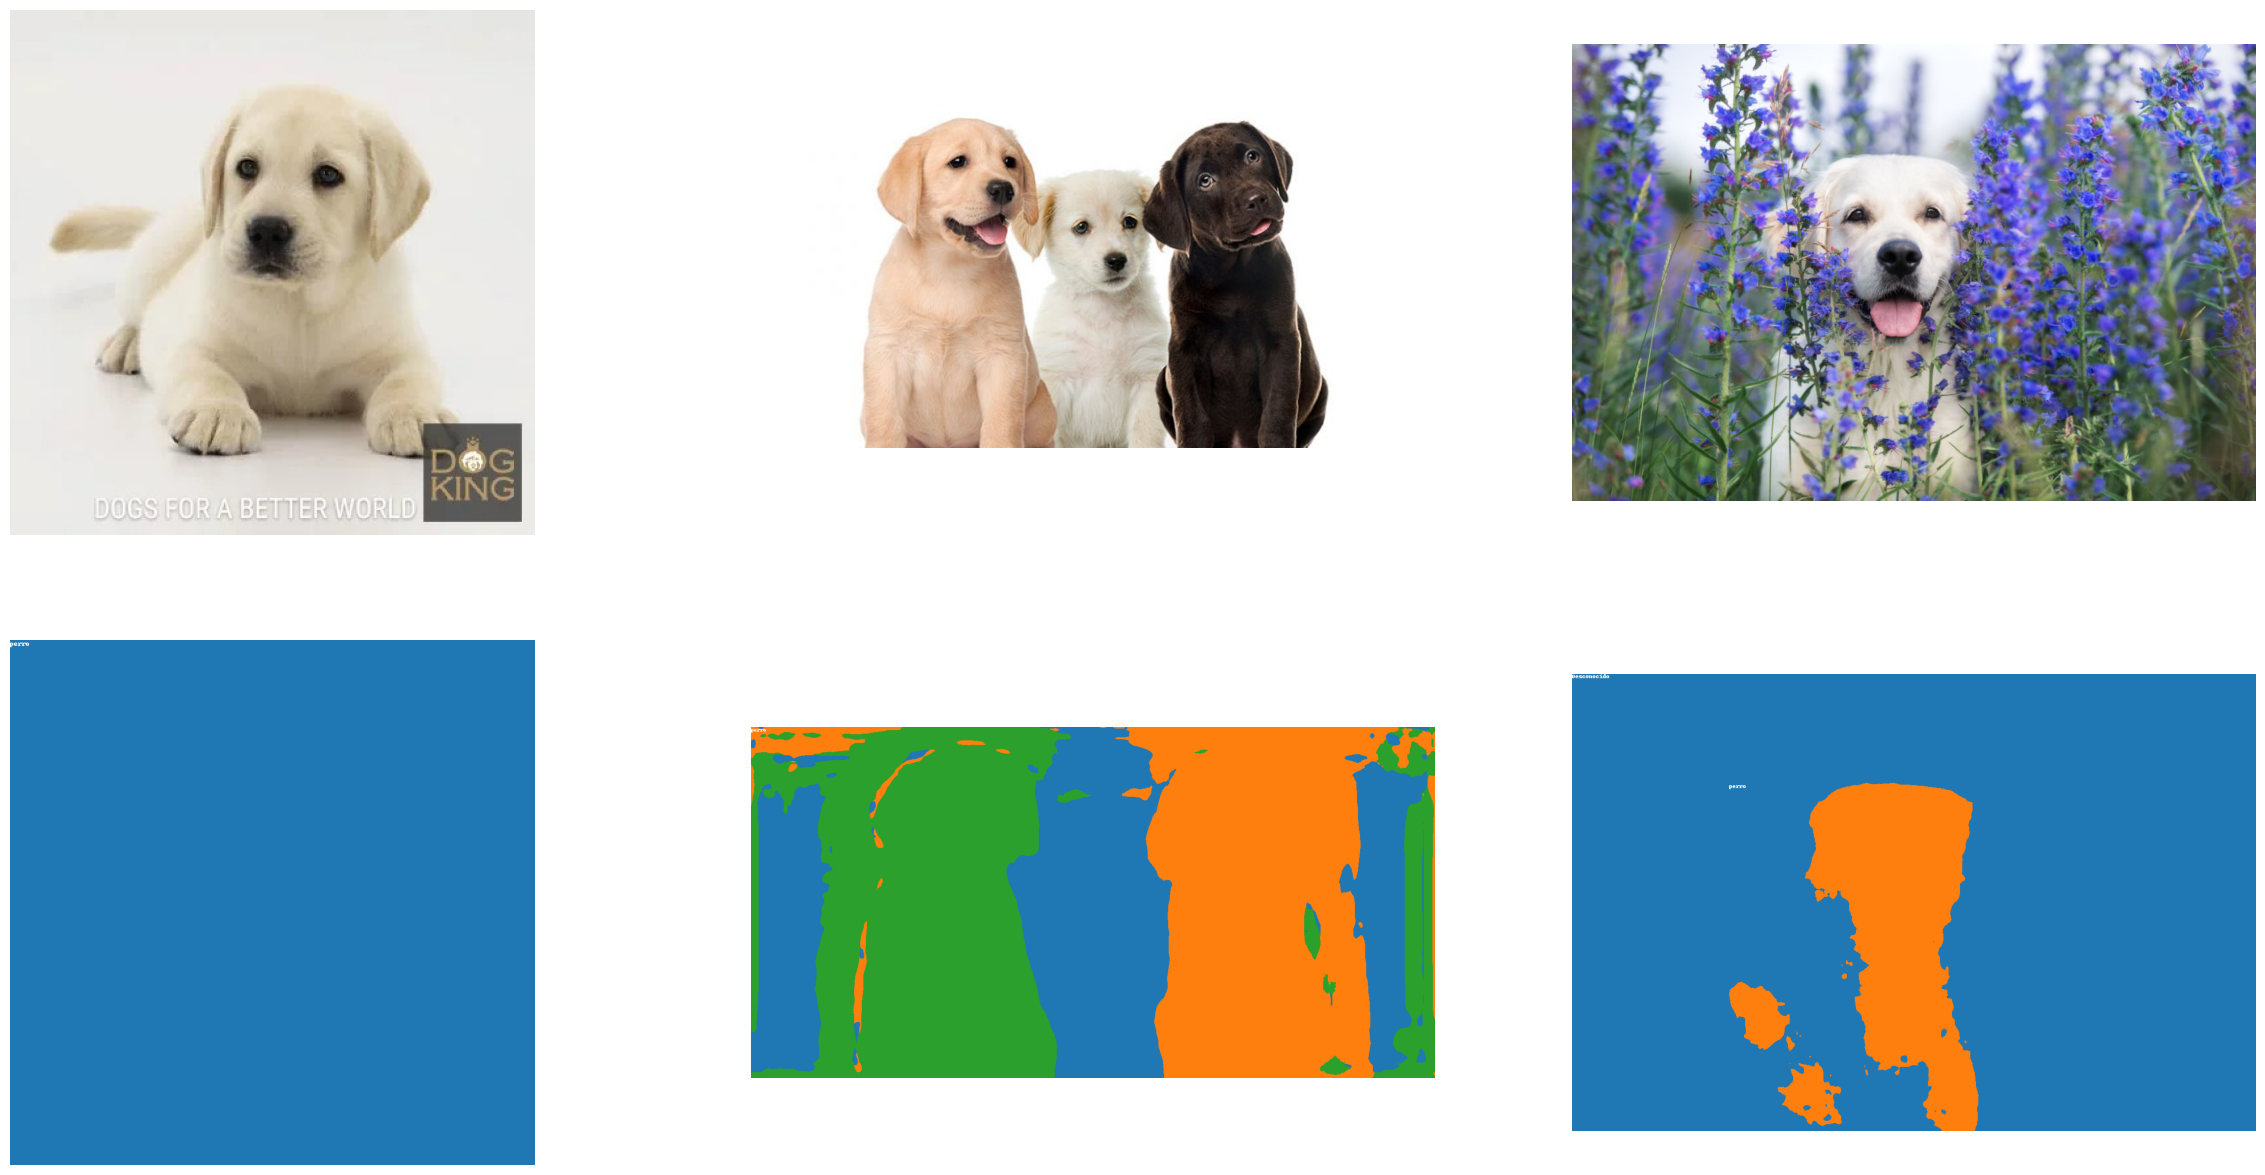

In [4]:
segmentador = Segmentador()
segmentador.segmentar()
segmentador.show()

## Conclusión
Podemos ver que en la primer imagen, en la que el perro se encuentra sólo el modelo no llega a detectarlo dado a que el color del pelo es muy similar al color del fondo en donde se encuentra. Lo mismo pasa con la segunda imagen con el perro blanco. En la foto en donde mejor se comporta el modelo es la última, ya que hay gran contraste entre el perro y las flores